# 0. Import packages

First, we import the necessary packages for this exercise.

In [2]:
import xarray as xr 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from datetime import datetime, timedelta
import numpy as np
import cartopy.feature as cfeature

# 1. Open simulation data

- Open the 2-meter temperature (variable `tas`) data for the `initSFX`-simulation starting at midnight on 1 July 2019 and running for 720 hours: `initSFX_2019070100_720_tas_2019-07-01T01_2019-07-31T00_3600_regridded.nc`
- Which units are used for the temperature? Convert these units to degrees Celsius (if necessary) for this exercise. This will facilitate the interpretation of results.
- Let's now focus on one location: the Royal Meteorological Institute of Belgium (RMI) in Uccle. Select the temperature data for this location from the simulation dataset. Do so by finding the point in the simulation grid, which lies closest to the RMI. The coordinates of the RMI are 50.799 N, 4.359 E.
     **Hint**: Look into the `method`-argument of the `sel`-function.
- From 22 until 26 July 2019, we experienced a short, but very intense heat wave in Belgium. The RMI speaks of a heat wave when the maximum temperatures in Uccle reach at least 25 degrees for at least 5 consecutive days, with at least 30 degrees  being reached on at least three days (see [heat wave definition](https://www.meteo.be/nl/info/weerwoorden/hittegolf) in Dutch). Select this 5-day period from the data and verify if these conditions for a heat wave are met in the simulation data.

## Solutions:

In [3]:
var_name_list = ["hfls", "hfss", "rnetds", "tas", "ts", "mrso", "pr", "tsl1", "tsl2", "mrsol1", "mrsol2", "mrsol3", "mrsfl1", "mrsfl2", "gflux", "evspsbl"] # "troad1"
run_name_list = ["initSFX", "initSFXnoTEB"]
ds_list_list = list()
ds_land_use_list = list()

for run_name in run_name_list:
    ds_list = list()

    for var_name in var_name_list:
        ds = xr.open_dataset(f"../data/{run_name}_2019070100_720_{var_name}_2019-07-01T01_2019-07-31T00_3600_regridded.nc", engine="netcdf4")
        ds_list.append(ds)

    ds = xr.merge(ds_list, compat="minimal")
    ds_list_list.append(ds)

    ds_land_use = xr.open_dataset(f"../data/{run_name}_landuse_regridded.nc", engine="netcdf4", chunks="auto")
    ds_land_use_list.append(ds_land_use)

ds = xr.concat(ds_list_list, dim="run_name")
ds_land_use = xr.concat(ds_land_use_list, dim="run_name")

ds = xr.merge([ds, ds_land_use])
ds

<xarray.Dataset>
Dimensions:      (time: 720, lon: 75, lat: 70, run_name: 2, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon          (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat          (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds    (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs          int64 0
    rstart       <U10 '2019070100'
  * run_name     (run_name) <U12 'initSFX' 'initSFXnoTEB'
Dimensions without coordinates: bnds
Data variables: (12/20)
    hfls         (run_name, time, lat, lon) float32 1.587 1.883 ... 0.2584
    hfss         (run_name, time, lat, lon) float32 2.34 7.096 ... -23.82 -24.24
    rnetds       (run_name, time, lat, lon) float32 -54.07 -55.14 ... -61.19
    tas          (run_name, time, lat, lon) float32 289.8 290.3 ... 295.8 295.9
    ts           (run_name, time, lat, lon) float32 290.1 290.6 ... 295.4 295.4
    mrso         (run_name, time, lat, lon) float32 0.6976 0.629 ... 0.3467
    ...           ...
    gflux        (run_name, time, lat, lon) float32 -57.19 -62.55 ... -37.21
    evspsbl      (run_name, time, lat, lon) float32 6.399e-07 ... 1.055e-07
    frac_town    (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_water   (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_nature  (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_sea     (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:19:07Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [4]:
def convert_to_Celsius(ds):
    for var_name in ["tas", "ts", "tsl1", "tsl2", "troad1"]:
        if var_name in ds:
            ds[var_name].values = ds[var_name].values - 273.15
            ds[var_name].attrs["units"] = "°C"

    return ds

ds = convert_to_Celsius(ds)
ds

<xarray.Dataset>
Dimensions:      (time: 720, lon: 75, lat: 70, run_name: 2, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon          (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat          (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds    (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs          int64 0
    rstart       <U10 '2019070100'
  * run_name     (run_name) <U12 'initSFX' 'initSFXnoTEB'
Dimensions without coordinates: bnds
Data variables: (12/20)
    hfls         (run_name, time, lat, lon) float32 1.587 1.883 ... 0.2584
    hfss         (run_name, time, lat, lon) float32 2.34 7.096 ... -23.82 -24.24
    rnetds       (run_name, time, lat, lon) float32 -54.07 -55.14 ... -61.19
    tas          (run_name, time, lat, lon) float32 16.69 17.13 ... 22.68 22.72
    ts           (run_name, time, lat, lon) float32 16.91 17.49 ... 22.22 22.24
    mrso         (run_name, time, lat, lon) float32 0.6976 0.629 ... 0.3467
    ...           ...
    gflux        (run_name, time, lat, lon) float32 -57.19 -62.55 ... -37.21
    evspsbl      (run_name, time, lat, lon) float32 6.399e-07 ... 1.055e-07
    frac_town    (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_water   (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_nature  (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_sea     (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:19:07Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [5]:
lat_rmi, lon_rmi = 50.799, 4.359
ds_rmi = ds.sel(lon=lon_rmi, lat=lat_rmi, method="nearest")
ds_rmi

<xarray.Dataset>
Dimensions:      (time: 720, run_name: 2, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
    lon          float64 4.38
    lat          float64 50.8
    time_bnds    (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs          int64 0
    rstart       <U10 '2019070100'
  * run_name     (run_name) <U12 'initSFX' 'initSFXnoTEB'
Dimensions without coordinates: bnds
Data variables: (12/20)
    hfls         (run_name, time) float32 3.154 2.854 2.877 ... 0.5838 0.7481
    hfss         (run_name, time) float32 10.32 8.763 5.317 ... -12.68 -13.5
    rnetds       (run_name, time) float32 -53.5 -53.28 -51.14 ... -55.66 -54.17
    tas          (run_name, time) float32 16.88 16.61 16.42 ... 17.41 17.18
    ts           (run_name, time) float32 17.29 16.93 16.6 ... 17.45 17.19 17.02
    mrso         (run_name, time) float32 0.555 0.5562 0.5574 ... 0.5006 0.5016
    ...           ...
    gflux        (run_name, time) float32 -64.68 -62.6 -57.05 ... -43.57 -41.42
    evspsbl      (run_name, time) float32 1.264e-06 1.141e-06 ... 3.035e-07
    frac_town    (run_name) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    frac_water   (run_name) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    frac_nature  (run_name) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    frac_sea     (run_name) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:19:07Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

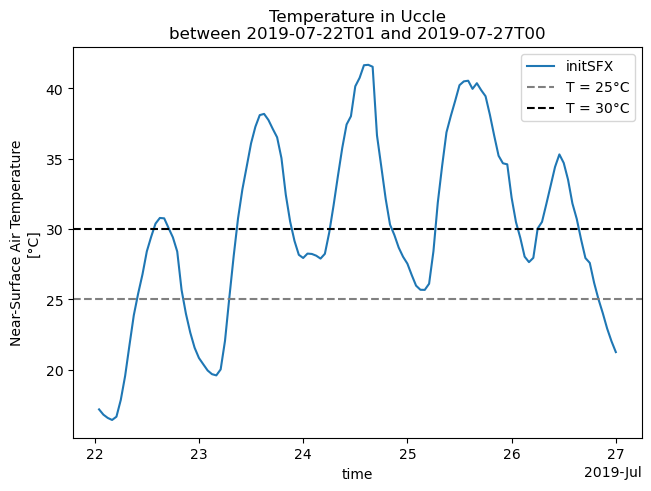

In [6]:
# Change this to period of heat wave
tstart = "2019-07-22T01"
tstop = "2019-07-27T00"
var_name = "tas"
run_name = "initSFX"
ds_rmi_period = ds_rmi.sel(time=slice(tstart, tstop), run_name=run_name)

### Temperatures

fig, ax = plt.subplots(figsize=(6.4, 4.8), layout="constrained")

var = ds_rmi_period[var_name]
long_name = var.attrs["long_name"]
var.plot(ax=ax, x="time", label=run_name)

ax.set_title(f"Temperature in Uccle\nbetween {tstart} and {tstop}")
ax.axhline(25, linestyle="--", color="grey", label="T = 25°C")
ax.axhline(30, linestyle="--", color="black", label="T = 30°C")
ax.legend()

plt.show()

This five-day period just qualifies as a heat wave.

# 2. Energy exchange with the surface

An important variable which influences the state of the atmosphere, and hence the weather, is the interaction with the surface. This interaction can be represented as the exchange of energy in the form of fluxes. We consider three types of energy exchange: radiation, sensible heat flux and latent heat flux. The variable names corresponding to these fluxes are respectively `rnetds`, `hfss` and `hfls`.

- Load in the simulation data of these fluxes.
- What are the units of these fluxes?
- Select again the data from Uccle and from the period between 22 and 26 July 2019. Plot the ernergy fluxes in function of time. 
- We will now determine make sense of the sign of these fluxes:
    - The radiation flux `rnetds` is the net radiation flux: it is the difference between the outgoing and incoming radiation. The incoming radiation is primarily shortwave radiation: either direct (from the Sun) or diffuse (scattered solar radiation). The outgoing radiation is emmited by the surface itself; it is longwave radiation. The difference between these two contributions is the net radiation flux. When is this variable positive and negative? What does this mean: is a positive flux directed into or out of the surface?
    - The sensible heat flux `hfss` is the heat transfer caused by the temperature difference between the surface and the atmosphere. The heat is transfered from the medium with the highest temperature to the medium with the lowest temperature. Compare the near-surface air temperature (`tas`) with the surface temperature (`ts`). Use this difference between `ts` and `ts` to derive the sign of the sensible heat flux.
    - The latent heat flux is caused by the evaporation of soil moisture. This evaporation requires latent heat for the phase transition between the liquid and vapor phase. This heat is extracted from the soil, which causes it to cool. Consider the latent heat flux together with the evaporation flux. At what times are these variables postive/negative? What do you notice about the latent heat flux and how can this be explained? Lastly, in what direction is the postive latent heat flux defined? 
- Calculate the net energy flux into the surface by adding or subtracting (depending on how the direction is defined) the three flux contributions.
- Compare the sign of the net energy flux to the course of the near-surface air temperature. Does this follow what you would expect?

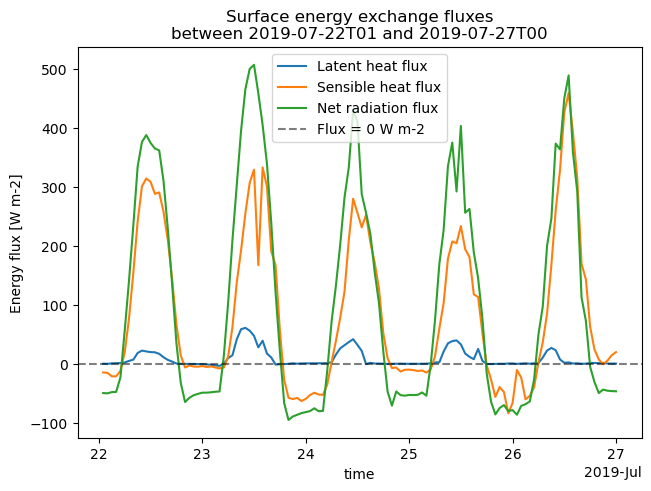

In [ ]:
lat_rmi, lon_rmi = 50.799, 4.359
ds_rmi = ds.sel(lon=lon_rmi, lat=lat_rmi, method="nearest")

tstart = "2019-07-22T01"
tstop = "2019-07-27T00"
run_name = "initSFX"
ds_rmi_period = ds_rmi.sel(time=slice(tstart, tstop), run_name=run_name)

fig, ax = plt.subplots(layout="constrained")

ds_rmi_period.hfls.plot(ax=ax, x="time", label="Latent heat flux")
ds_rmi_period.hfss.plot(ax=ax, x="time", label="Sensible heat flux")
ds_rmi_period.rnetds.plot(ax=ax, x="time", label="Net radiation flux")

ax.set_title(f"Surface energy exchange fluxes\nbetween {tstart} and {tstop}")
ax.set_ylabel("Energy flux [W m-2]")

ax.axhline(linestyle="--", color="k", alpha=0.5, label="Flux = 0 W m-2")
ax.legend()

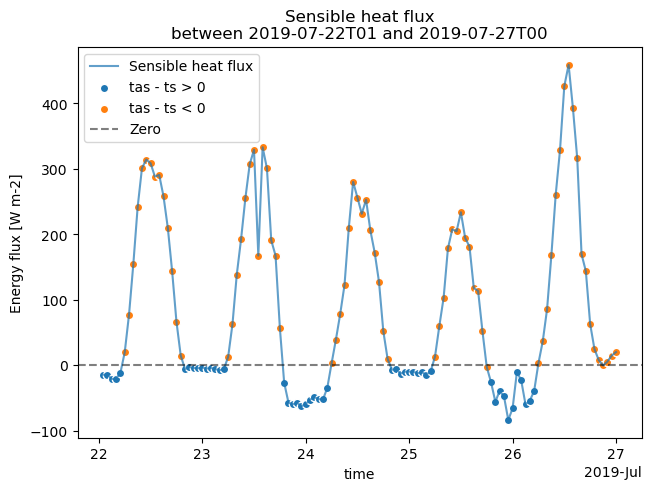

In [333]:
fig, ax = plt.subplots(layout="constrained")

hfss = ds_rmi_period.hfss
temp_diff = (ds_rmi_period.tas - ds_rmi_period.ts)

hfss.plot(ax=ax, x="time", label="Sensible heat flux", alpha=0.7)
hfss.where(temp_diff > 0).plot.scatter(ax=ax, x="time", label="tas - ts > 0")
hfss.where(temp_diff < 0).plot.scatter(ax=ax, x="time", label="tas - ts < 0")

ax.set_title(f"Sensible heat flux\nbetween {tstart} and {tstop}")
ax.set_ylabel("Energy flux [W m-2]")

ax.axhline(linestyle="--", color="k", alpha=0.5, label="Zero")
ax.legend()

plt.show()

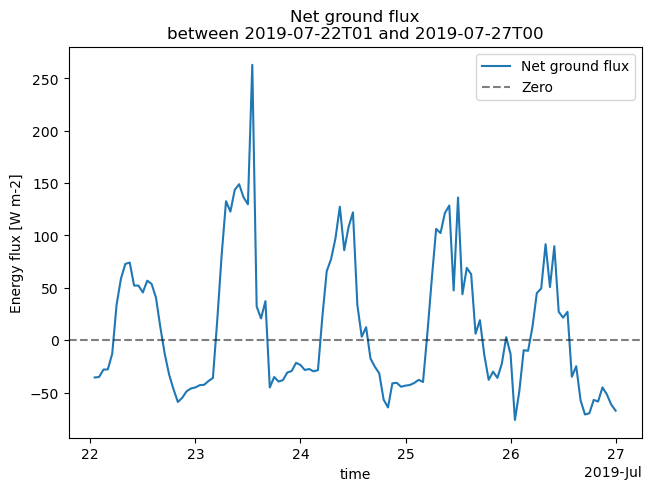

In [334]:
fig, ax = plt.subplots(layout="constrained")

netflux = ds_rmi_period.rnetds - ds_rmi_period.hfss - ds_rmi_period.hfls
netflux.plot(ax=ax, x="time", label="Net ground flux")

ax.set_title(f"Net ground flux\nbetween {tstart} and {tstop}")
ax.set_ylabel("Energy flux [W m-2]")

ax.axhline(linestyle="--", color="k", alpha=0.5, label="Zero")
ax.legend()

plt.show()

What to do with the fluxes? 
- Connection between netflux and tsl1 ? No, becuase there is still some flux to tsl2
- Connection between netflux and tas ? Not correct, because not all contributions from netflux heat up/cool down tas. Latent heat flux does not influence the temperature, and radiation does not come from lowest level of atmosphere.
- Connection between tas and hfss ? Not present. Probably because tas is also cooled down by giving energy to upper levels in atmosphere.

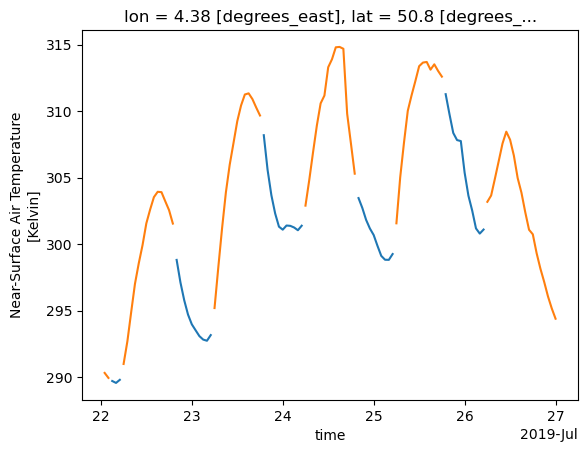

In [91]:
tas = ds_rmi_period.tas
hfss = ds_rmi_period.hfss

tas.where(hfss < 0).plot()
tas.where(hfss > 0).plot()

# 2. Investigate UHI

In this next part of the practical, we will investigate the Urban Heat Island (UHI) in the simulations. We will do some by comparing to the MOCCA observational network. This network consists of 6 stations located in the city of Ghent. Each station is placed in a different urban environment, to gauge the influence of this environment on the micro-climate. One of these stations is located outside of the city, in Melle, and can be considered as a rural station. We can define the UHI intensity by calculating the temperature difference between an urban and a rural station. This difference in temperature depends on the time of day. Therefore, the UHI is often studied by computing a so-called diurnal (or daily) cycle. This diurnal cycle is constructed by taking an average of the data over a certain period for each hour of the day. For example, all the data at midnight is averaged together, the data at 1:00, ... This represents the variations throughout the day.

For this exercise, we will work with the `tas`-variable from the `initSFX`-simulation from 1 July 2019 (720 hours). We will also need the land use information stored in `initSFX_landuse_regridded.nc`.  

- Load in the MOCCA station data for the period of the heat wave. These data are stored in the file `MOCCA_tas_2019-07-22T01_2019-07-27T00.nc`. Explore the data.
- We will now consider these locations in the simulation data. Select the points in the simulation data which are closest to each of the stations. You should get an xarray DataSet with the same dimensions as the observations: `(time, locations)`
- For each of the locations, consider the town fraction. Select the locations with the lowest and highest town fraction from the stations. We will use these to represent rural and urban locations respectively.
- For the period of the heat wave (22-26 July 2019), calculate the diurnal cycle of temperature for both locations for the simulation data. Plot the difference between the urban and rural diurnal cycles. Is a urban heat island present in the simulations? What is the magnitude? At what hours of the day is it the highest?
- Repeat the previous step for the observational data. Compare this result with the simulation data.
- Where does the difference in UHI intensity between the simulation and observations come from? Plot the bias of the diurnal cycle in temperature for both locations.

## Solutions:

In [7]:
tstart = "2019-07-22T01"
tstop = "2019-07-27T00"
obs = xr.open_dataset(f"../data/MOCCA_tas_{tstart}_{tstop}.nc", engine="netcdf4")
obs

<xarray.Dataset>
Dimensions:   (time: 120, location: 6)
Coordinates:
    index     (time) int64 ...
    year      (time) int64 ...
    month     (time) int64 ...
    day       (time) int64 ...
    hour      (time) int64 ...
  * time      (time) datetime64[ns] 2019-07-22T01:00:00 ... 2019-07-27
    lon       (location) float64 ...
    lat       (location) float64 ...
  * location  (location) <U13 'Provinciehuis' 'Melle' ... 'Sint-Bavo'
Data variables:
    tas       (location, time) float64 ...

In [8]:
var_name_list = ["tas"] # "troad1"
run_name_list = ["initSFX"]
ds_list_list = list()
ds_land_use_list = list()

for run_name in run_name_list:
    ds_list = list()

    for var_name in var_name_list:
        ds = xr.open_dataset(f"../data/{run_name}_2019070100_720_{var_name}_2019-07-01T01_2019-07-31T00_3600_regridded.nc", engine="netcdf4")
        ds_list.append(ds)

    ds = xr.merge(ds_list, compat="minimal")
    ds_list_list.append(ds)

    ds_land_use = xr.open_dataset(f"../data/{run_name}_landuse_regridded.nc", engine="netcdf4", chunks="auto")
    ds_land_use_list.append(ds_land_use)

ds = xr.concat(ds_list_list, dim="run_name")
ds_land_use = xr.concat(ds_land_use_list, dim="run_name")

ds = xr.merge([ds, ds_land_use])
ds = convert_to_Celsius(ds)
ds

<xarray.Dataset>
Dimensions:      (time: 720, lon: 75, lat: 70, run_name: 1, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon          (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat          (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds    (time, bnds) datetime64[ns] ...
    height       float64 ...
    crs          int64 ...
    rstart       <U10 ...
  * run_name     (run_name) <U7 'initSFX'
Dimensions without coordinates: bnds
Data variables:
    tas          (run_name, time, lat, lon) float32 16.69 17.13 ... 22.42 22.4
    frac_town    (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_water   (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_nature  (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_sea     (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:18:38Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [9]:
ds_locations_list = list()

for location in obs.location:
    lat = obs.lat.sel(location=location).values
    lon = obs.lon.sel(location=location).values
    ds_location = ds.sel(lat=lat, lon=lon, method="nearest").sel(run_name="initSFX")
    ds_locations_list.append(ds_location.assign_coords(location=location.values))

ds_locations = xr.concat(ds_locations_list, dim="location")
ds_locations

<xarray.Dataset>
Dimensions:      (time: 720, location: 6, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
    lon          (location) float64 3.75 3.82 3.75 3.68 3.75 3.75
    lat          (location) float64 51.07 50.98 51.12 51.07 51.02 51.07
    time_bnds    (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    height       float64 2.0
    crs          int64 0
    rstart       <U10 '2019070100'
    run_name     <U7 'initSFX'
  * location     (location) <U13 'Provinciehuis' 'Melle' ... 'Sint-Bavo'
Dimensions without coordinates: bnds
Data variables:
    tas          (location, time) float32 16.67 16.74 16.79 ... 17.89 17.6 17.24
    frac_town    (location) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    frac_water   (location) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    frac_nature  (location) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    frac_sea     (location) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-12T10:18:38Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [10]:
ds_locations.frac_town.load()

<xarray.DataArray 'frac_town' (location: 6)>
array([0.48960358, 0.0720843 , 0.20285054, 0.41070563, 0.41838965,
       0.48960358], dtype=float32)
Coordinates:
    lon       (location) float64 3.75 3.82 3.75 3.68 3.75 3.75
    lat       (location) float64 51.07 50.98 51.12 51.07 51.02 51.07
    height    float64 2.0
    crs       int64 0
    rstart    <U10 '2019070100'
    run_name  <U7 'initSFX'
  * location  (location) <U13 'Provinciehuis' 'Melle' ... 'Sint-Bavo'
Attributes:
    standard_name:  town_fraction
    long_name:      Town Fraction
    units:          %

Provinciehuis (and Sint-Bavo) have the highest town fraction (49 %); Melle has the lowest (7 %).

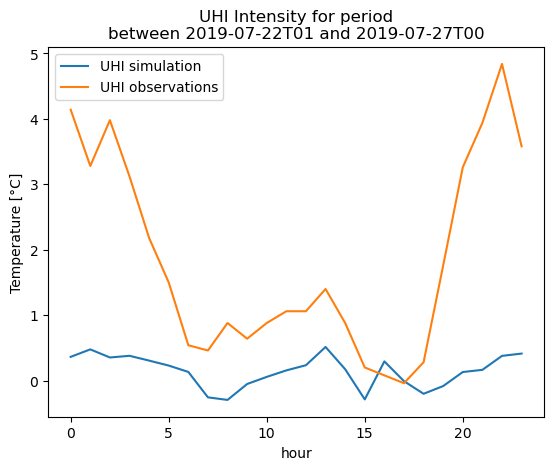

In [11]:
fig, ax = plt.subplots()

ds_uhi = ds_locations.sel(location="Provinciehuis") - ds_locations.sel(location="Melle")
ds_uhi_period = ds_uhi.sel(time=slice(tstart, tstop))
tas_uhi_dc = ds_uhi_period.groupby("time.hour").mean().tas
tas_uhi_dc.plot(ax=ax, label="UHI simulation")

obs_uhi = obs.sel(location="Provinciehuis") - obs.sel(location="Melle")
obs_tas_uhi_dc = obs_uhi.groupby("time.hour").mean().tas
obs_tas_uhi_dc.plot(ax=ax, label="UHI observations")

ax.set_title(f"UHI Intensity for period\nbetween {tstart} and {tstop}")
ax.set_ylabel("Temperature [°C]")
ax.legend()

plt.show()

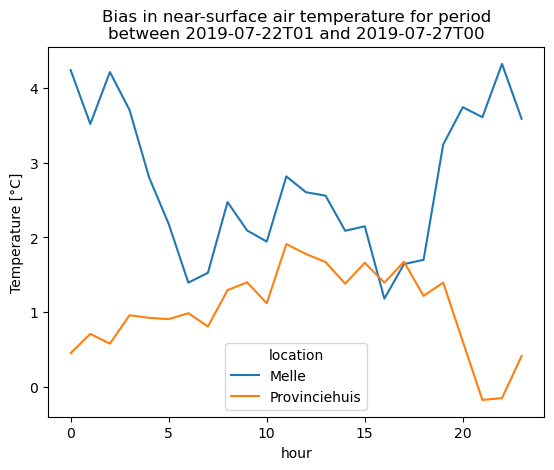

In [320]:
bias = (ds_locations - obs).sel(location=["Melle", "Provinciehuis"])
bias_tas_dc = bias.groupby("time.hour").mean().tas

fig, ax = plt.subplots()
bias_tas_dc.plot(ax=ax, hue="location")
ax.set_title(f"Bias in near-surface air temperature for period\nbetween {tstart} and {tstop}")
ax.set_ylabel("Temperature [°C]")

plt.show()

# 4. Simulation without urban areas

**Explanation about SURFEX and tile approach.**

Let's now include a second simulation. This simulation was performed without the town module of the surface scheme. The town fraction is hence zero in every pixel. So, in this simulation we should not see the urban effects from the previous part. Check this by following the next steps:
- Load in the `tas` (near-surface air temperature) data for the simulations `initSFX` (with towns) and `initSFXnoTEB` (without towns) for the simualtion starting on 1 July 2019 (720 hours). Select the period of the heat wave: 22 until 26 July 2019. 
- Load in the `land_use` data for both simulations. Plot all fractions for both simulations and verify the differences are as expected.
- Select only the data from points which have a town fraction higher than 20 % in the `initSFX`-simulations. Do this for both simulations. In the `initSFXnoTEB`-simulation these points will have a 0 % town fraction.
- Calculate the average diurnal cycle of the temperature averaged over all points for both simulations. The average diurnal (or daily) cycle is calculated by taking the average of a variable for each hour of the day. The `groupby`-function from xarray will prove useful for this part.
- Compare the diurnal cycles for both simulations. What do you see? Plot the difference between both cycles. When is the difference largest?

**afwerken**

## Solutions:

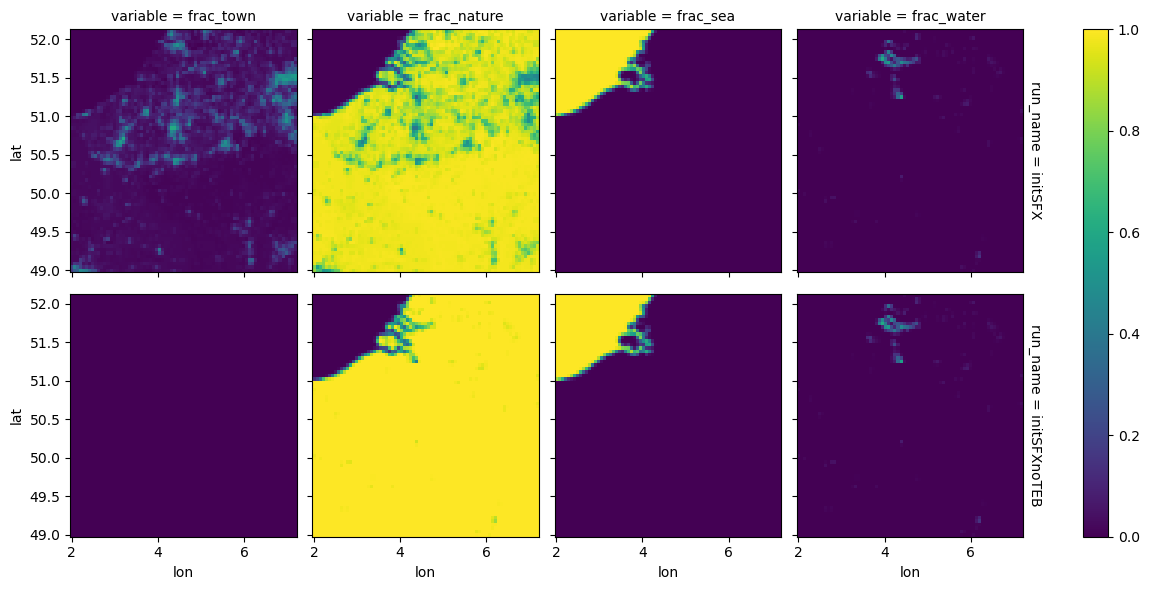

In [241]:
ds_land_use = ds[["frac_town", "frac_nature", "frac_sea", "frac_water"]]
ds_land_use.to_dataarray().plot(row="run_name", col="variable")
plt.show()

Only the town and nature fractions differ between both simulations. The town fraction is zero as expected in `initSFXnoTEB`.

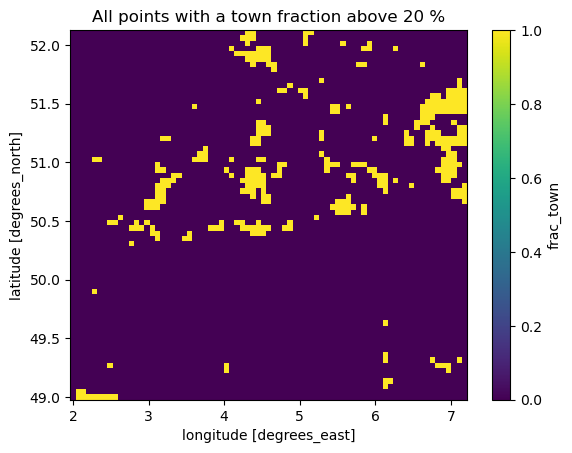

In [237]:
frac_town = ds_land_use.frac_town.sel(run_name="initSFX")
town_mask = frac_town > 0.2

fig, ax = plt.subplots()
town_mask.plot(ax=ax)
ax.set_title("All points with a town fraction above 20 %")
plt.show()

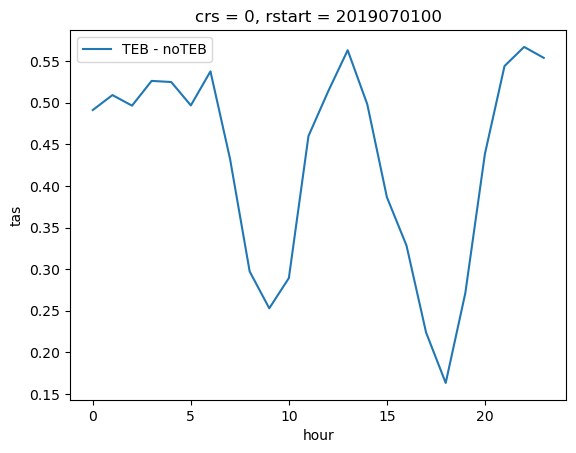

In [239]:
tstart = "2019-07-22T01"
tstop = "2019-07-27T00"

ds_period = ds.sel(time=slice(tstart, tstop))
tas_period = ds_period.tas
tas_period_town_mask = tas_period.where(town_mask)
tas_period_town_mask_diurnal_cycle = tas_period_town_mask.groupby("time.hour").mean()

tas_dc = tas_period_town_mask_diurnal_cycle.mean(dim=["lat", "lon"])
tas_nature_dc = tas_dc.sel(run_name="initSFXnoTEB")
tas_town_dc = tas_dc.sel(run_name="initSFX")

fig, ax = plt.subplots()
(tas_town_dc - tas_nature_dc).plot(ax=ax, x="hour", label="TEB - noTEB")
ax.legend()

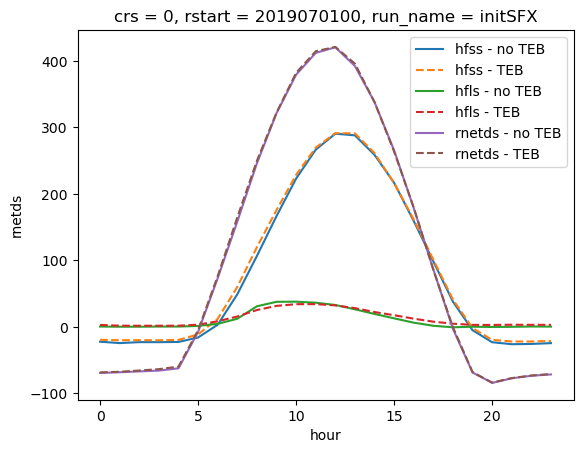

In [244]:
tstart = "2019-07-22T01"
tstop = "2019-07-27T00"

ds_period = ds.sel(time=slice(tstart, tstop))
frac_town = ds_period.frac_town
frac_nature = ds_period.frac_nature

fluxes_period = ds_period[["hfss", "hfls", "rnetds"]]
fluxes_period_town_mask = fluxes_period.where(town_mask)
fluxes_period_town_mask_diurnal_cycle = fluxes_period_town_mask.groupby("time.hour").mean()

fluxes_dc = fluxes_period_town_mask_diurnal_cycle.mean(dim=["lat", "lon"])
fluxes_nature_dc = fluxes_dc.sel(run_name="initSFXnoTEB")
fluxes_town_dc = fluxes_dc.sel(run_name="initSFX")

fig, ax = plt.subplots()

for flux in ["hfss", "hfls", "rnetds"]:
    fluxes_nature_dc[flux].plot(ax=ax, label=f"{flux} - no TEB")
    fluxes_town_dc[flux].plot(ax=ax, linestyle="--", label=f"{flux} - TEB")

ax.legend()
plt.show()

# Extra 1. Locations with a heatwave

- Which is the longest heat wave in the simulation data? 
- Apply this to the CLIMATE-GRID dataset. How long are the heat waves in this dataset?
- Compare observations and simulations. Use ... **score to compare binary data**

In [509]:
heatwave_days = xr.zeros_like(tasmax, dtype=bool)

for lat in tasmax.lat:
    for lon in tasmax.lon:
        tasmax_point = tasmax.sel(lat=lat, lon=lon)
        heatwave = False
        start_list = list()
        stop_list = list()
        prev_time = None

        for time in tasmax_point.time:
            tasmax_value = tasmax_point.sel(time=time)
            if tasmax_value < 25 and heatwave:
                heatwave = False
                stop = prev_time.values
                stop_list.append(stop)

            if tasmax_value > 25 and not heatwave:
                start = time.values
                heatwave = True
                start_list.append(start)
            
            prev_time = time

        if heatwave:
            stop_list.append(prev_time.values)

        assert len(start_list) == len(stop_list)

        real_start_list = list()
        real_stop_list = list()

        for idx in range(len(start_list)):
            start = start_list[idx]
            stop = stop_list[idx]
            tasmax_period = tasmax_point.sel(time=slice(start, stop))
            days_above_30 = (tasmax_period > 30).sum()
            
            if days_above_30 >= 3:
                real_start_list.append(start)
                real_stop_list.append(stop)

        assert len(real_start_list) == len(real_stop_list)

        for idx in range(len(real_start_list)):
            start = real_start_list[idx]
            stop = real_stop_list[idx]

            heatwave_days.loc[start:stop, lat, lon] = True

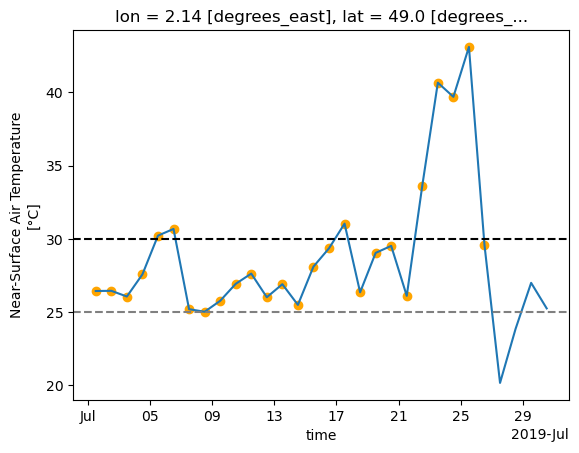

In [538]:
lat = 49
lon = 2.15
heatwave_days_point = heatwave_days.sel(lat=lat, lon=lon, method="nearest")
tasmax_point = tasmax.sel(lon=lon, lat=lat, method="nearest")

fig, ax = plt.subplots()
tasmax_point.plot(ax=ax)
tasmax_point.where(heatwave_days_point).plot.scatter(ax=ax, color="orange")
ax.axhline(25, linestyle="--", color="grey")
ax.axhline(30, linestyle="--", color="k")

# Extra 2. Cold start vs. soil spin-up

In this practical, we have discussed the interaction between the surface and the atmosphere through fluxes. The two simulations we discussed in here, `initSFX` and `initSFXnoTEB`, have been run with an initial surface state, which was taken from a long-term climate simulation. This allows the soil variables to reach an equilibrium state with the atmospheric variables. As these soil variables (such as temperature and moisture) are slowly-evolving, particularly the deep soil variables, the time to reach this equilibrium in a simulation can be of the order of months.

On the other hand, we have also run both simulations (with and without TEB) with a default initial surface state (we call this a cold start). These simulations are respectively: `baseline` and `noTEB`. For this simulation, the soil moisture and temperature variables are not yet in an equilibrium state and will hence first evolve towards this state. This will impact the atmospheric variables close to the surface.

Investigate these concepts by following these steps:
- Load in the following variables for the `baseline`- and `initSFX`-simulations for the simulations starting on 1 July 2019 (720 hours):
    - `tas`: near-surface air temperature
    - `hfss`, `hfls`, `rnetds`: surface energy fluxes
    - `ts`: surface temperature
    - `mrso`: total soil moisture
    - `tsl2`: deep soil temperature
- Select the data at the locations of the MOCCA stations.
- Plot the temperature for both simulations and compare to observations. Which simulation performs best? Focus on the heatwave period between 22 and 26 July 2019.
- Plot the average over the simulation domain of all variables. How can you see the behaviour of moving to equilibrium from these plots? Can you explain the differences between these two simulations? Think about how these variables influence each other and explain how these differences are connected.

## Solutions:

In [539]:
var_name_list = ["hfls", "hfss", "rnetds", "tas", "ts", "mrso", "pr", "tsl1", "tsl2", "mrsol1", "mrsol2", "mrsol3", "mrsfl1", "mrsfl2", "gflux", "evspsbl"] # "troad1"
run_name_list = ["baseline", "initSFX"]
ds_list_list = list()
ds_land_use_list = list()

for run_name in run_name_list:
    ds_list = list()

    for var_name in var_name_list:
        ds = xr.open_dataset(f"../data/{run_name}_2019070100_720_{var_name}_2019-07-01T01_2019-07-31T00_3600_regridded.nc", engine="netcdf4")
        ds_list.append(ds)

    ds = xr.merge(ds_list, compat="minimal")
    ds_list_list.append(ds)

    ds_land_use = xr.open_dataset(f"../data/{run_name}_landuse_regridded.nc", engine="netcdf4", chunks="auto")
    ds_land_use_list.append(ds_land_use)

ds = xr.concat(ds_list_list, dim="run_name")
ds_land_use = xr.concat(ds_land_use_list, dim="run_name")

ds = xr.merge([ds, ds_land_use])
ds

<xarray.Dataset>
Dimensions:      (time: 720, lon: 75, lat: 70, run_name: 2, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon          (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat          (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds    (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs          int64 0
    rstart       <U10 '2019070100'
  * run_name     (run_name) <U8 'baseline' 'initSFX'
Dimensions without coordinates: bnds
Data variables: (12/20)
    hfls         (run_name, time, lat, lon) float32 17.88 16.41 ... 0.6988
    hfss         (run_name, time, lat, lon) float32 -25.09 -20.85 ... -28.61
    rnetds       (run_name, time, lat, lon) float32 -46.82 -45.89 ... -67.98
    tas          (run_name, time, lat, lon) float32 289.2 289.5 ... 295.6 295.6
    ts           (run_name, time, lat, lon) float32 288.5 288.6 ... 295.0 294.9
    mrso         (run_name, time, lat, lon) float32 1.372 1.352 ... 0.3511
    ...           ...
    gflux        (run_name, time, lat, lon) float32 -38.83 -39.92 ... -39.93
    evspsbl      (run_name, time, lat, lon) float32 7.256e-06 ... 2.824e-07
    frac_town    (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_water   (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_nature  (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_sea     (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-07T16:08:42Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [546]:
def convert_to_Celsius(ds):
    for var_name in ["tas", "ts", "tsl1", "tsl2", "troad1"]:
        if var_name in ds:
            ds[var_name].values = ds[var_name].values - 273.15
            ds[var_name].attrs["units"] = "°C"

    return ds

ds = convert_to_Celsius(ds)
ds

<xarray.Dataset>
Dimensions:      (time: 720, lon: 75, lat: 70, run_name: 2, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
  * lon          (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat          (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    time_bnds    (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs          int64 0
    rstart       <U10 '2019070100'
  * run_name     (run_name) <U8 'baseline' 'initSFX'
Dimensions without coordinates: bnds
Data variables: (12/20)
    hfls         (run_name, time, lat, lon) float32 17.88 16.41 ... 0.6988
    hfss         (run_name, time, lat, lon) float32 -25.09 -20.85 ... -28.61
    rnetds       (run_name, time, lat, lon) float32 -46.82 -45.89 ... -67.98
    tas          (run_name, time, lat, lon) float32 16.06 16.37 ... 22.42 22.4
    ts           (run_name, time, lat, lon) float32 15.32 15.45 ... 21.82 21.75
    mrso         (run_name, time, lat, lon) float32 1.372 1.352 ... 0.3511
    ...           ...
    gflux        (run_name, time, lat, lon) float32 -38.83 -39.92 ... -39.93
    evspsbl      (run_name, time, lat, lon) float32 7.256e-06 ... 2.824e-07
    frac_town    (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_water   (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_nature  (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
    frac_sea     (run_name, lat, lon) float32 dask.array<chunksize=(1, 70, 75), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-07T16:08:42Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [540]:
tstart = "2019-07-22T01"
tstop = "2019-07-27T00"
obs = xr.open_dataset(f"../data/MOCCA_tas_{tstart}_{tstop}.nc", engine="netcdf4")
obs

<xarray.Dataset>
Dimensions:   (time: 120, location: 6)
Coordinates:
    index     (time) int64 ...
    year      (time) int64 ...
    month     (time) int64 ...
    day       (time) int64 ...
    hour      (time) int64 ...
  * time      (time) datetime64[ns] 2019-07-22T01:00:00 ... 2019-07-27
    lon       (location) float64 ...
    lat       (location) float64 ...
  * location  (location) <U13 'Provinciehuis' 'Melle' ... 'Sint-Bavo'
Data variables:
    tas       (location, time) float64 ...

In [549]:
ds_locations_list = list()

for location in obs.location:
    lat = obs.lat.sel(location=location).values
    lon = obs.lon.sel(location=location).values
    ds_location = ds.sel(lat=lat, lon=lon, method="nearest")
    ds_locations_list.append(ds_location.assign_coords(location=location.values))

ds_locations = xr.concat(ds_locations_list, dim="location")
ds_locations

<xarray.Dataset>
Dimensions:      (time: 720, location: 6, run_name: 2, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T01:00:00 ... 2019-07-31
    lon          (location) float64 3.75 3.82 3.75 3.68 3.75 3.75
    lat          (location) float64 51.07 50.98 51.12 51.07 51.02 51.07
    time_bnds    (time, bnds) datetime64[ns] 2019-07-01 ... 2019-07-31
    crs          int64 0
    rstart       <U10 '2019070100'
  * run_name     (run_name) <U8 'baseline' 'initSFX'
  * location     (location) <U13 'Provinciehuis' 'Melle' ... 'Sint-Bavo'
Dimensions without coordinates: bnds
Data variables: (12/20)
    hfls         (location, run_name, time) float32 5.119 0.9933 ... 4.356 4.638
    hfss         (location, run_name, time) float32 -19.37 -18.89 ... 3.528
    rnetds       (location, run_name, time) float32 -42.57 -39.7 ... -43.19
    tas          (location, run_name, time) float32 15.9 15.42 ... 17.6 17.24
    ts           (location, run_name, time) float32 14.83 14.29 ... 17.68 17.3
    mrso         (location, run_name, time) float32 1.173 1.144 ... 0.3184
    ...           ...
    gflux        (location, run_name, time) float32 -25.28 -18.73 ... -48.33
    evspsbl      (location, run_name, time) float32 2.076e-06 ... 1.853e-06
    frac_town    (location, run_name) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    frac_water   (location, run_name) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    frac_nature  (location, run_name) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    frac_sea     (location, run_name) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes: (12/33)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    ALARO-1 (CY43T2) - SURFEX v8.0
    Conventions:               CF-1.11
    activity_id:               DD
    comment:                   
    contact:                   wout.dewettinck@ugent.be
    ...                        ...
    version_realization_info:  
    creation_date:             2024-11-07T16:08:42Z
    frequency:                 1hr
    StartTime:                 2019-07-01T00:00
    EndTime:                   2019-07-31T00:00
    CDO:                       Climate Data Operators version 2.0.6 (https://...

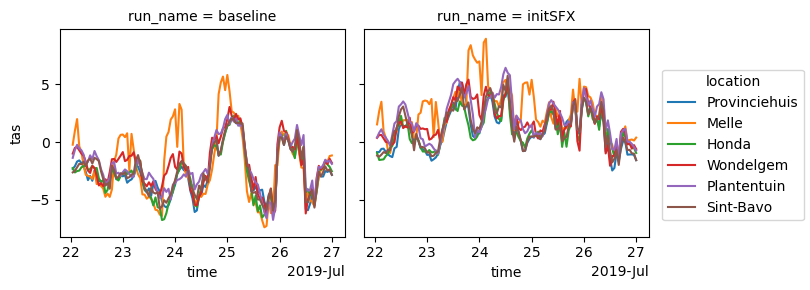

In [551]:
(ds_locations.tas - obs.tas).plot(x="time", hue="location", col="run_name")

In [552]:
(ds_locations.tas - obs.tas).mean(dim="time")

<xarray.DataArray 'tas' (location: 6, run_name: 2)>
array([[-2.71403936,  1.04013443],
       [-2.01451111,  2.72074661],
       [-2.70597651,  1.06752533],
       [-2.02824748,  1.78207764],
       [-2.07626973,  2.05037593],
       [-2.49320602,  1.26096776]])
Coordinates:
  * run_name  (run_name) <U8 'baseline' 'initSFX'
  * location  (location) <U13 'Provinciehuis' 'Melle' ... 'Sint-Bavo'
    crs       int64 0
    rstart    <U10 '2019070100'

The baseline simulation (with a cold start) has a significant cold bias between 2 and 3 degrees for all 6 MOCCA locations. The spun-up simulation has a warm bias between 1 and 2 degrees (with 2.7 at one location).

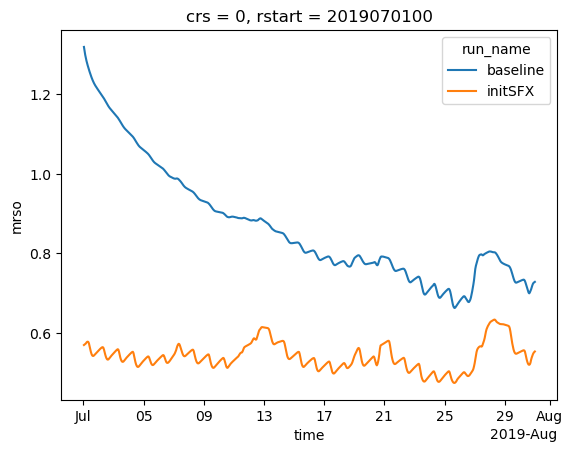

In [557]:
ds_mean = ds.mean(dim=["lat", "lon"])
ds_mean.mrso.plot(x="time", hue="run_name")

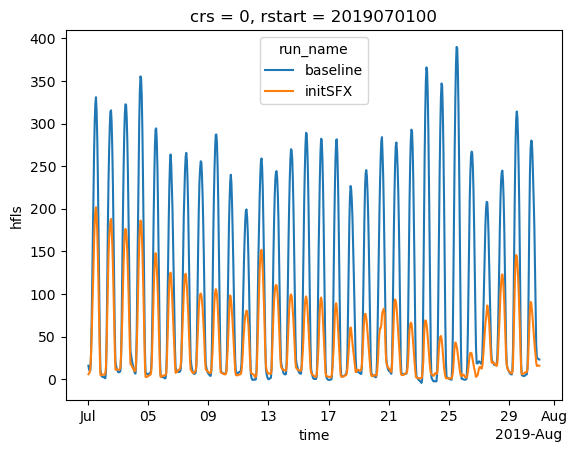

In [558]:
ds_mean.hfls.plot(x="time", hue="run_name")

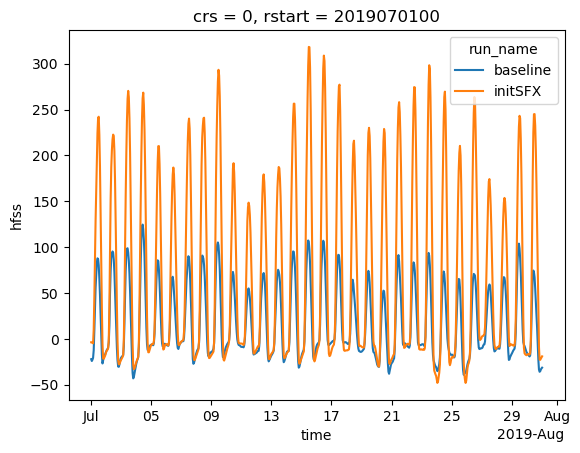

In [559]:
ds_mean.hfss.plot(x="time", hue="run_name")

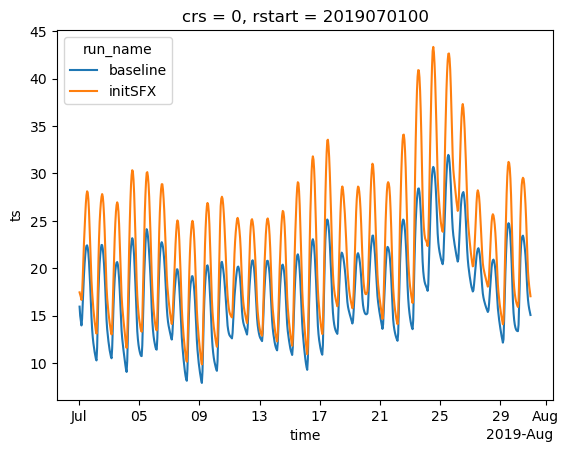

In [560]:
ds_mean.ts.plot(x="time", hue="run_name")

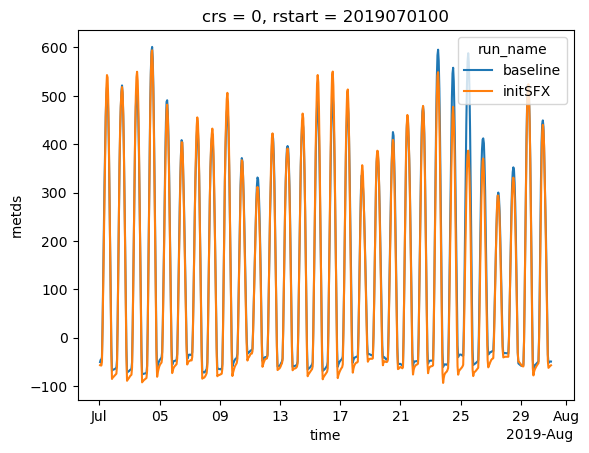

In [561]:
ds_mean.rnetds.plot(x="time", hue="run_name")

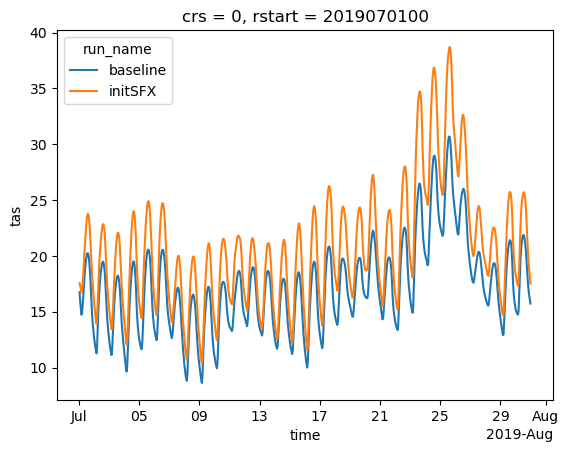

In [562]:
ds_mean.tas.plot(x="time", hue="run_name")